<span id='intro'></span>
# 1 - Introduction

<p>This notebook contains an analysis of Kaggle's "Netflix Movies and TV Shows" dataset, published under a CC0: Public Domain license.</p>

<div>
    <span id='index' style='font-size:1.4rem;'>INDEX</span>
    <ol>
        <li><a href='#intro'>Introduction</a></li>
        <li><a href='#import'>Import libraries and dataset</a></li>
        <li><a href='#cleaning'>Data Cleaning and Data Wrangling</a></li>
        <li><a href='#analysis'>Data Analysis</a></li>
     </ol>

</div>

<span id='import'></span>
# 2 - Import libraries and data

In [1]:
!pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 7.0 MB/s eta 0:00:0000:0100:01m


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from pywaffle import Waffle
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [26]:
%%html
<style>
    .green {
        background-color: #d2e9c9;
        border-radius: 8px;
        padding: 1rem;
    }
</style>

<span><a href='#index'>Back to index</a></span>

<span id='cleaning'></span>
# 3 - Data Cleaning and Data Wrangling

We will take the following steps to understand the data in the dataset and clean it before performing our analysis:

<ul>
    <li><a href='#step1'>Step 1: Understanding the dataset</a></li>
    <li><a href='#step2'>Step 2: Removing whitespaces</a></li>
    <li><a href='#step3'>Step 3: Removing duplicated entries</a></li>
    <li><a href='#step4'>Step 4: Finding and dealing with empty data</a></li>
    <li><a href='#step5'>Step 5: Converting Data Types</a></li>
</ul>


<span id='step1'></span>
## Step 1: Understanding the dataset

In [6]:
print(df.shape)
print(df.dtypes)

(8807, 12)
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


<div class='green'>
    <p><b>Findings</b>: The dataset has 8807 rows, with 12 attributes each. All data types are string except the 'release_year' data, which is an integer. </p>
</div>

<p>It will be more useful for analysis to have 'date_added' as a <i>datetime</i> type and extract the year, month and day each title was released. Additionally we will process the string entries to remove leading and trailing whitespaces, should there be any.</p>


In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<div class='green'>
    <b>Findings</b>: The column 'listed_in' contains the categories under which the title is listed in Netflix. Each title can be listed in one or more categories. For analysis it would be more useful to have the separate categories, so we would perform One Hot Encoding of this attribute. 
</div>

In [8]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


<div class='green'>
<b>Findings</b>: The oldest movie was released in 1925! That's a really old movie compared with the rest, especially as 75% of entries are from 2013 onwards. It seems like an outlier; we can use a <i>boxplot</i> to confirm this.
</div>

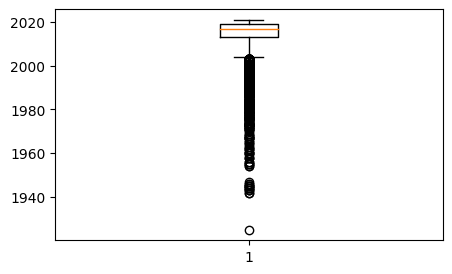

In [9]:
f, ax = plt.subplots(figsize=(5,3))
ax.boxplot(df['release_year'])
plt.show()

<div class='green'>
<b>Findings</b>: There are definitely some outliers, however we won't remove them for now.
</div>

<span id='step2'></span>
## Step 2: Removing whitespaces

The majority of attributes are 'string' types. We will remove any preceding or trailing white spaces, as well as any double spaces.

In [10]:
def remove_whitespaces(df):
    for i in df.columns:
        if df[i].dtype == 'object':
            df[i] = df[i].str.strip().replace('  ', ' ')
remove_whitespaces(df)

<span id='step3'></span>
## Step 3: Removing duplicated entries

In [11]:
df.duplicated().sum()

0

<div class='green'>There are no duplicated entries in the dataset.</div>

<span id='step4'></span>
## Step 4: Finding and dealing with empty data

In [12]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<div class='green'>
    <span><b>Findings</b>:</span>
    <ul>
        <li>There are 2634 shows where the director is missing. That's almost 30% of the shows!</li>
        <li>There are 825 shows without information on the cast. That's 9.37% of the shows.</li>
        <li>There are 831 shows where the production country is missing. That's 9.43% of the shows.</li>
        <li>There are 10 shows where the date when added to Netflix is missing. That's 0.11% of the shows.</li>
        <li>There are only 4 shows where the rating is missing.</li>
        <li>There are only 3 shows where the duration is missing.</li>
    </ul>
</div>
</br>
<div>
    <p><b>We will deal with the missing data as follows:</b></p>
    <ol>
        <li>Remove the entries with missing 'date_added', 'rating' and 'duration'</li>
        <li>Fill in missing director, cast and country with 'Unknown'</li>
    <ol>
</div>

In [13]:
# Remove entries with missing 'date_added', 'rating' and 'duration'
df.dropna(axis=0, subset=['date_added', 'rating', 'duration'], inplace=True, ignore_index=True)

# Fill in missing director, cast and country with 'Unknown'
df.fillna({'director': 'Unknown', 'cast': 'Unknown', 'country': 'Unknown'}, inplace=True)

<span id='step5'></span>
## Step 5: Converting Data Types

<p><b>Step 5.1</b>: We will convert 'date_added' to <i>datetime</i> and separate it into 3 new columns: 'year_added', 'month_added', 'day_added'.</p>

In [14]:
# Convert 'date_added into datetime
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y")

# Separate date into 3 new columns
df['year_added'] = df['date_added'].dt.year.astype(int)
df['month_added'] = df['date_added'].dt.month.astype(int)
df['day_added'] = df['date_added'].dt.day.astype(int)
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24


<p><b>Step 5.2</b>: We will perform One Hot Encoding of the categories under which a title can be listed in.</p>
<p>We'll break the problem in two steps:</p>
<ul>
    <li>Identify how many unique categories are there</li>
    <li>Create a new column for each category and assign a 1/0 value depending on the title belonging to that category or not</li>
</ul>

In [15]:
categories_list = df['listed_in'].str.split(',').to_list()
categories = set([cat.strip() for entry in categories_list for cat in entry])
print(len(categories))

42


<p class='green'><b>Findings</b>: There are 42 different categories. We'll use a for loop to go over the categories and create a new column for each using apply with a 'category_checker' function that returns 1 if the category is in the entry, 0 otherwise.</p>

In [16]:
def category_checker(x, cat):
    if cat in x:
        return 1
    else:
        return 0

for category in categories:
     df[category] = df['listed_in'].apply(category_checker, args = (category,), by_row='compat').astype(int)

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Docuseries,Movies,Action & Adventure,Crime TV Shows,Classic & Cult TV,TV Shows,Stand-Up Comedy & Talk Shows,Korean TV Shows,Spanish-Language TV Shows,Kids' TV
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,0,0,0,0,0,1,0,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,...,0,0,1,1,0,1,0,0,0,0


<p><b>Step 5.3</b>: We will convert the titles' duration into an integer.</p>

In [17]:
df['duration'] = df['duration'].str.replace(' min', '').str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

<span><a href='#index'>Back to index</a></span>

<span id='analysis'></span>
# 4 - Data Analysis

<div>
    <p>During the analysis phase we will aim to answer the following questions:</p>
    <ul>
        <li><a href='#q1'>Q1. How has the number of titles available in Netflix evolved in time?</a></li>
        <li><a href='#q2'>Q2. Which are the countries that have produced the largest number of Movies available in the platform?</a></li>
        <li><a href='#q3'>Q3. Which are the countries that have produced the largest number of TV Shows available in the platform?</a></li>
        <li><a href='#q4'>Q4. What is the rating distribution for Movies and TV Shows?</a></li>
        <li><a href='#q5'>Q5. Is there a particular period in the year where more titles are added to the platform?</a></li>
        <li><a href='#q6'>Q6. How novel are the titles, i.e, how much time between production year and availability in the platform?</a></li>
        <li><a href='#q7'>Q7. What's the duration distribution for movies and TV shows?</a></li>
        <li><a href='#q8'>Q8. What's the distribution of titles per category?</a></li>
    </ul>
</div>

<span id='q1'></span>
## Q1. How has the number of titles available in Netflix evolved in time?

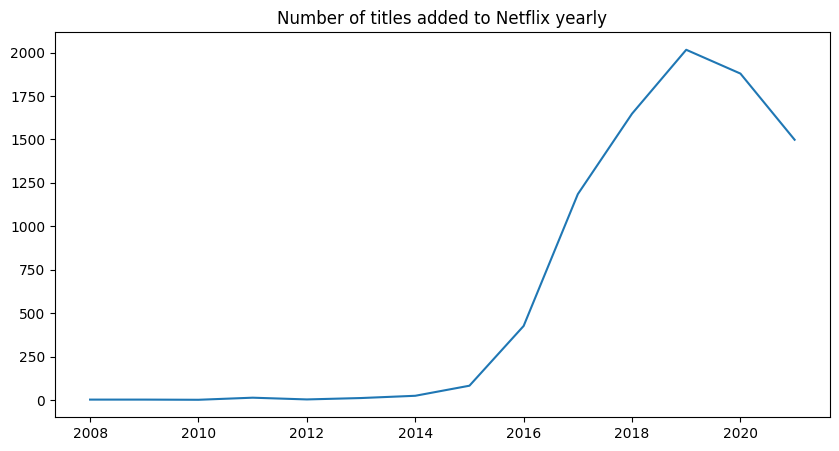

In [18]:
added_per_year = df['year_added'].value_counts().reset_index().sort_values('year_added')
f, ax = plt.subplots(figsize=(10,5))
ax.plot(added_per_year['year_added'], added_per_year['count'])
ax.set_title('Number of titles added to Netflix yearly')
plt.show()

<div class='green'>
Netflix launched on January 16, 2007. It seems strange that there are very few titles added in the initial years, the large majority of titles where added from 2017 onwards. Netflix states in its website that some titles do leave Netflix because of licensing agreements, that may explain the low number of titles up to 2015.      
</div>          

<span id='q2'></span>
## Q2. Which are the countries that have produced the largest number of Movies available in the platform?

In [19]:
df_movies = df[df['type'] == 'Movie']
movies_per_country = df_movies['country'].value_counts()
#  We will remove the titles with missing producing country for this analysis
movies_per_country.drop('Unknown', inplace=True)
movies_per_country = movies_per_country[:20].reset_index()

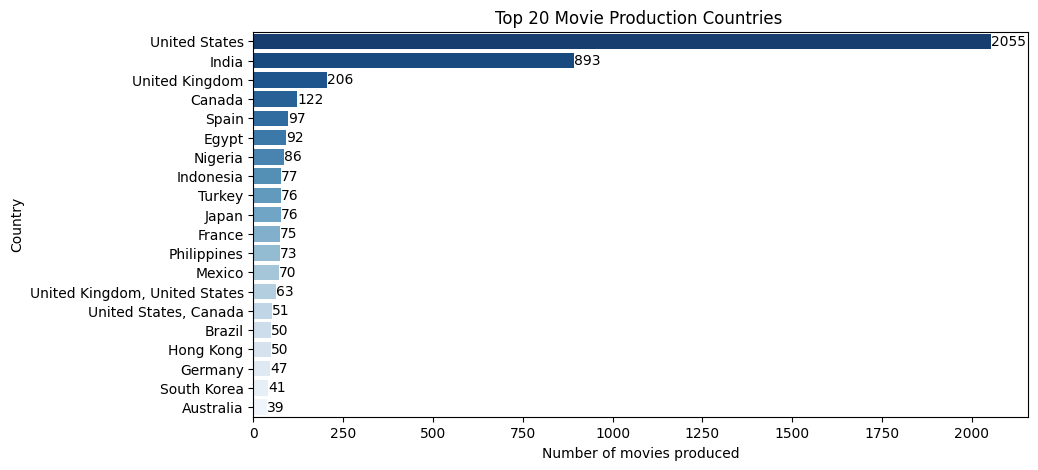

In [20]:
f, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='count', y='country', data=movies_per_country, palette = 'Blues_r')
ax.set(ylabel='Country', xlabel='Number of movies produced', title='Top 20 Movie Production Countries ')
ax.bar_label(ax.containers[0], fontsize=10);
f.show()

<div class='green'>The United States, India and the United Kingdom are the top 3 producers of movies in the platform. We can see if this order distribution has been maintained in time.</div>

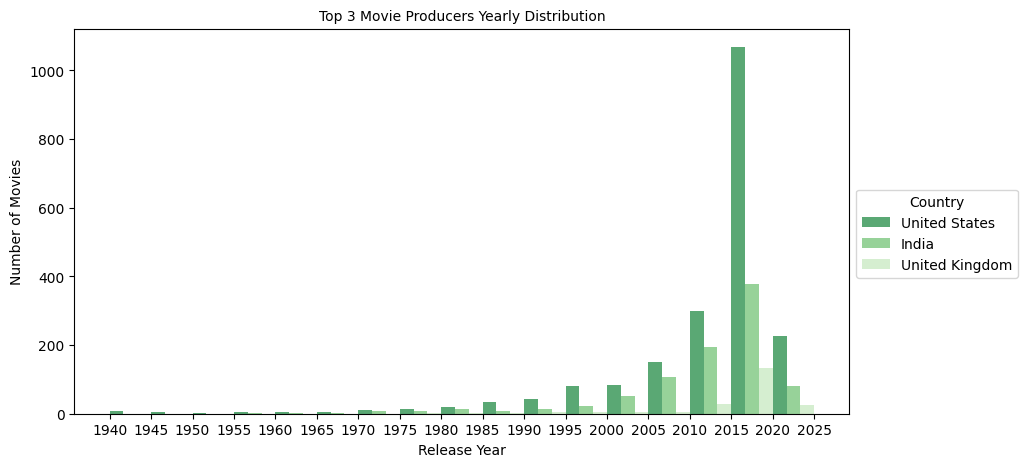

In [21]:
top3_movies = df_movies[(df_movies['country'] == 'United States') | (df_movies['country'] == 'India') | (df_movies['country'] == 'United Kingdom')]
bins = np.arange(1940, 2030, 5)
f, ax = plt.subplots(figsize=(10,5))
sns.histplot(top3_movies, x='release_year', hue='country', hue_order=['United States', 'India', 'United Kingdom'], 
             multiple='dodge', bins=bins, palette='Greens_r', edgecolor=None)
ax.set_title('Top 3 Movie Producers Yearly Distribution', fontsize=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 0.6), title='Country')
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Movies')
ax.set_xticks(bins)
plt.show()

<div class='green'>
    <p>The order is maintained yearly. The United States is the biggest movie producer, followed by India and 
        the United Kingdom.</p>
    <p>The number of UK produced movies only became significant from 2015 onwards.</p>
</div>

<span id='q3'></span>
## Q3. Which are the countries that have produced the largest number of TV Shows available in the platform?

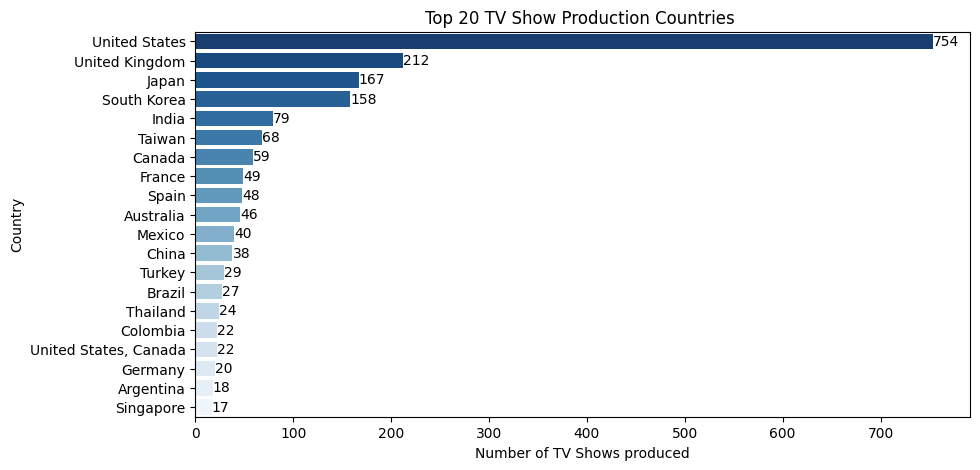

In [22]:
df_tv_shows = df[df['type'] == 'TV Show']
shows_per_country = df_tv_shows['country'].value_counts()
shows_per_country.drop('Unknown', inplace=True)
shows_per_country = shows_per_country[:20].reset_index()
f, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='count', y='country', data=shows_per_country, palette = 'Blues_r')
ax.set(ylabel='Country', xlabel='Number of TV Shows produced', title='Top 20 TV Show Production Countries ')
ax.bar_label(ax.containers[0], fontsize=10);
f.show()

<div class='green'>
    <p>In the case of TV Shows, the United States continues to be the largest producer, however the United Kingdom is in second place and Japan and South Korea occupy a close third and fourth place.</p>
    <p>Let's plot the yearly distribution for these top 4 TV show producers.</p>
</div>

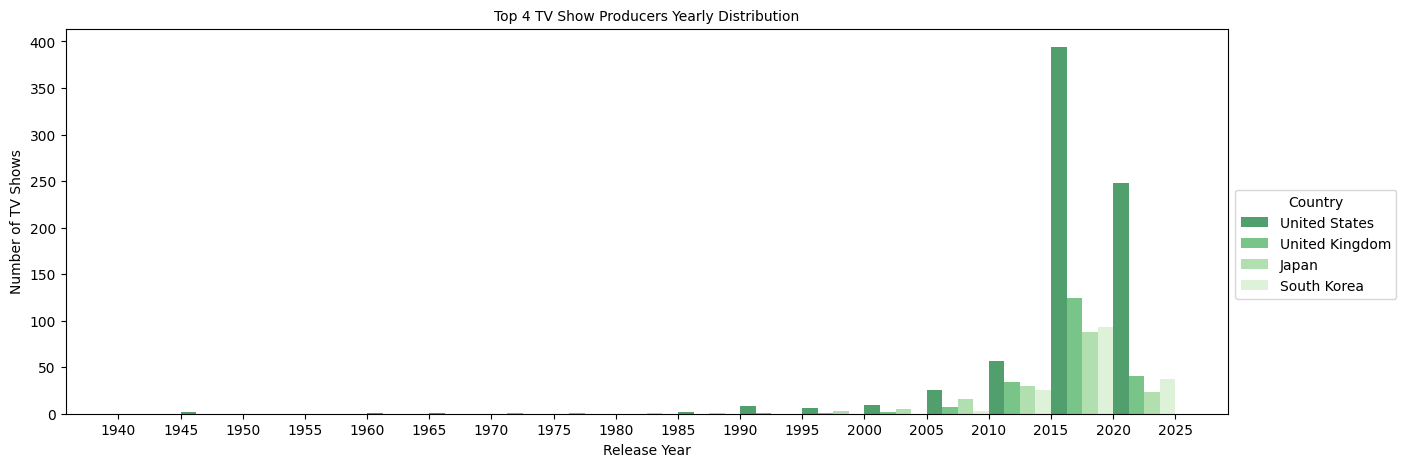

In [23]:
top4_tv_shows = df_tv_shows[(df_tv_shows['country'] == 'United States') | (df_tv_shows['country'] == 'United Kingdom') | 
                            (df_tv_shows['country'] == 'Japan') | (df_tv_shows['country'] == 'South Korea')]
bins = np.arange(1940, 2030, 5)
f, ax = plt.subplots(figsize=(15,5))
sns.histplot(top4_tv_shows, x='release_year', hue='country', hue_order=['United States', 'United Kingdom', 'Japan', 'South Korea'], 
             multiple='dodge', bins=bins, palette='Greens_r', edgecolor=None)
ax.set_title('Top 4 TV Show Producers Yearly Distribution', fontsize=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 0.6), title='Country')
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of TV Shows')
ax.set_xticks(bins)
f.show()

<div class='green'>Japan was the second TV Show producer in the platform in the period 2005-2010, however it has been overcome by the United Kingdom since 2010 and even dropped to fourth place from 2015, surpassed by South Korea.</div>

<span id='q4'></span>
## Q4. What is the rating distribution for Movies and TV Shows?

In [24]:
print(f"Number of unique ratings: {len(df['rating'].unique())}")
df['rating'].value_counts()

Number of unique ratings: 14


rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

<div>
    <p>There are 14 different rating categories, some of the with the same or similar meaning. We would further categorise them into minimum age category by grouping them as:</p>
    <table >
        <tr style='border-bottom: 1px solid #ddd; color: white; font-size: 1.2rem;'>
            <th style='text-align: left; background-color:black;'>Rating</th>
            <td style='background-color:red;'>TV-MA</td>
            <td style='background-color:red;'>R</td>
            <td style='background-color:red;'>NC-17</td>
            <td style='background-color:orange;'>TV-14</td>
            <td style='background-color:orange;'>PG-13</td>
            <td style='background-color:green;'>TV-Y7</td>
            <td style='background-color:green;'>TV-PG</td>
            <td style='background-color:green;'>PG</td>
            <td style='background-color:green;'>TV-Y7-FV</td>
            <td style='background-color:green;'>TV-Y</td>
            <td style='background-color:green;'>TV-G</td>
            <td style='background-color:green;'>G</td>
            <td style='background-color:blue;'>NR</td>
            <td style='background-color:blue;'>UR</td>
         </tr>
         <tr style='border-bottom: 1px solid #ddd; color: white; font-size: 1.2rem;'>
            <th style='background-color:black;'>Category</th>
            <td colspan='3' style='text-align: center; background-color:red;'>Adults</td>
            <td colspan='2' style='text-align: center; background-color:orange;'>Teens</td>
            <td colspan='7' style='text-align: center; background-color:green;'>Children</td>
            <td colspan='2' style='text-align: center; background-color:blue;'>Unrated</td>
         </tr>
    </table>
</div>

In [27]:
ratings = df.groupby('type')['rating'].value_counts().reset_index()
def rating_category(x):
    if x in ['TV-MA','R','NC-17']:
        return 'Adults'
    elif x in ['TV-14','PG-13']:
        return 'Teens'
    elif x in ['TV-Y7','TV-PG','PG','TV-Y7-FV','TV-Y','TV-G','G']:
        return 'Children'
    else:
        return 'Unrated'
ratings['category'] = ratings['rating'].apply(rating_category)

In [28]:
ratings_per_category = ratings.groupby(['type', 'category'])['count'].sum().reset_index()
movie_ratings_per_category = ratings_per_category[ratings_per_category['type']=='Movie'].sort_values(by='count', ascending=False)
show_ratings_per_category = ratings_per_category[ratings_per_category['type']=='TV Show'].sort_values(by='count', ascending=False)

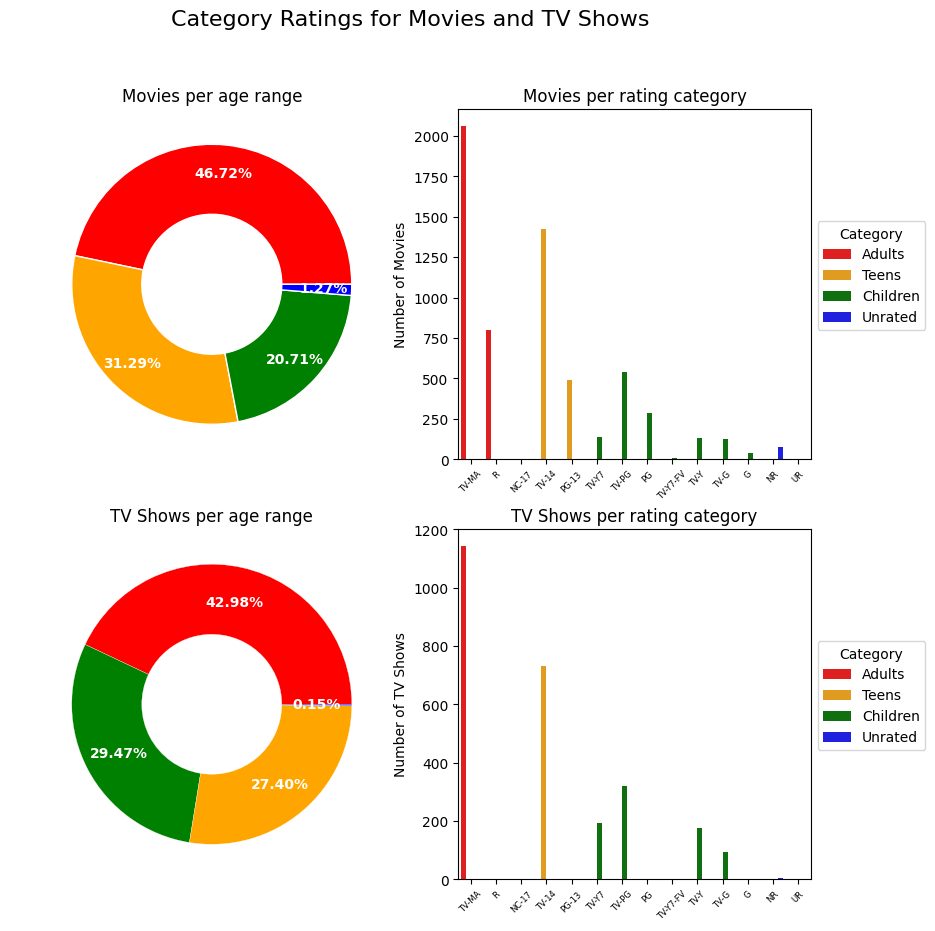

In [29]:

f, ax = plt.subplots(2,2, figsize=(10,10))
order = ['TV-MA','R','NC-17','TV-14','PG-13','TV-Y7','TV-PG','PG','TV-Y7-FV','TV-Y','TV-G','G','NR','UR']
palette = ['red', 'orange','green', 'blue']

# Movie plots
ax[0,0].pie(movie_ratings_per_category['count'], labels=movie_ratings_per_category['category'],
           autopct='%1.2f%%', pctdistance=0.80,
            colors=palette, wedgeprops={'width': 0.5, "linewidth": 1, "edgecolor": "white"},
           textprops={'color': 'white', 'fontweight': 'bold'})
movies_cat=sns.barplot(ratings[ratings['type'] == 'Movie'], x='rating', y='count', hue='category', 
            palette=palette, order=order, ax=ax[0,1])
movies_cat.set_xticklabels(labels=order,rotation=45, fontsize=6)

# TV Show plots
ax[1,0].pie(show_ratings_per_category['count'], labels=show_ratings_per_category['category'],
           autopct='%1.2f%%', colors=['red', 'green', 'orange', 'blue'],
           pctdistance=0.75,
            wedgeprops={'width': 0.5, "linewidth": 0.2, "edgecolor": "white"},
           textprops={'color': 'white', 'fontweight': 'bold'})
shows_cat = sns.barplot(ratings[ratings['type'] == 'TV Show'], x='rating', y='count', hue='category', 
            palette=palette, order=order, ax=ax[1,1])
shows_cat.set_xticklabels(labels=order,rotation=45, fontsize=6)
sns.move_legend(ax[0,1], "upper left", bbox_to_anchor=(1, 0.7), title='Category')
sns.move_legend(ax[1,1], "upper left", bbox_to_anchor=(1, 0.7), title='Category')
ax[0,1].set_ylabel('Number of Movies')
ax[0,1].set_xlabel('')
ax[1,1].set_ylabel('Number of TV Shows')
ax[1,1].set_xlabel('')
ax[0,0].set_title('Movies per age range')
ax[0,1].set_title('Movies per rating category')
ax[1,0].set_title('TV Shows per age range')
ax[1,1].set_title('TV Shows per rating category')
plt.suptitle('Category Ratings for Movies and TV Shows', fontsize=16)
plt.show()

<div class='green'>The majority of Movies and TV Shows in the platform are for adults. There is larger proportion of TV Shows for children than for teenagers, contrary to what we can observe in movies.</div>

<span id='q5'></span>
## Q5. Is there a particular period in the year where more titles are added to the platform?

We saw in Q1 that most of the titles in the dataset have been added from 2017 onwards, so we will use the period 2017 - 2021 for this analysis.

In [30]:
df_5y = df[df['year_added'] > 2016]
df_5y_add = df_5y.groupby('month_added')['year_added'].value_counts().reset_index().sort_values(by=['month_added', 'year_added'])

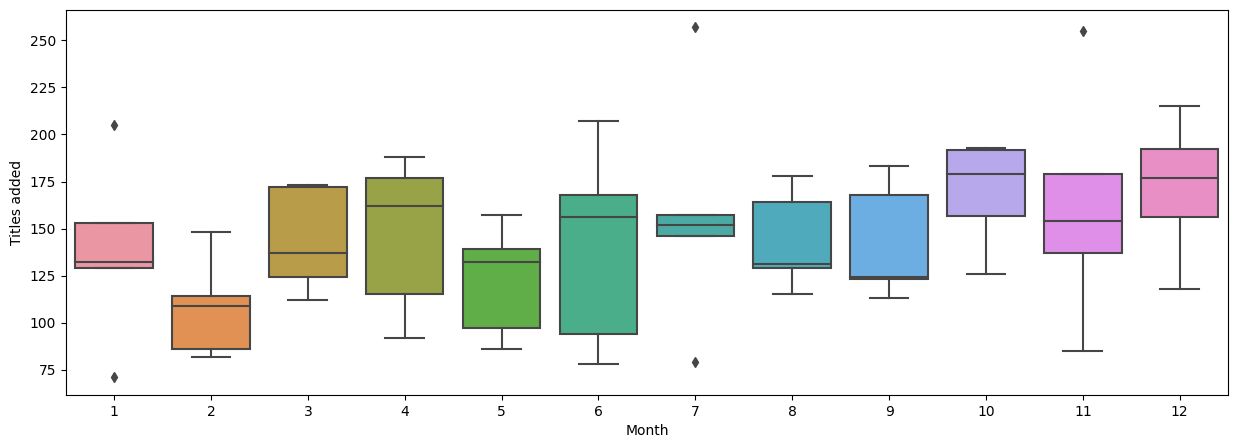

In [31]:
f, ax = plt.subplots(figsize=(15,5))
sns.boxplot(df_5y_add, x='month_added', y='count')
ax.set_ylabel('Titles added')
ax.set_xlabel('Month')
plt.show()

<div class='green'>
    <p>October and December are the months where on average more titles are added, while February is the month with the lowest number of titles added.</p>
</div>
</br>
<div>
    <p>We can speculate that more titles are added in December in the lead up to Christmas. Let's check if this hypothesis is true with a word cloud for December added titles:</p>
</div>

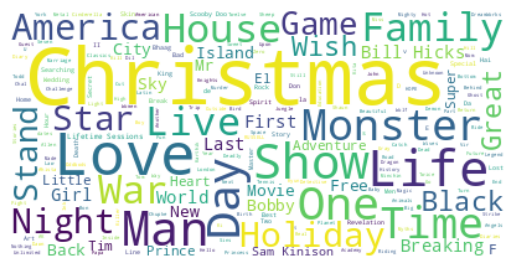

In [32]:
df_december_titles = df_5y[df_5y['month_added'] == 12]['title']
df_december_titles_text = ', '.join(df_december_titles.tolist())

wordcloud = WordCloud(background_color="white", stopwords=set(STOPWORDS)).generate(df_december_titles_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<div class='green'>Our hypothesis is true! The most frequent word in December titles is Christmas!</div>
</br>
<div>Would it also be the case that more titles are added in October in the lead up to Halloween? Let's check it:</div>

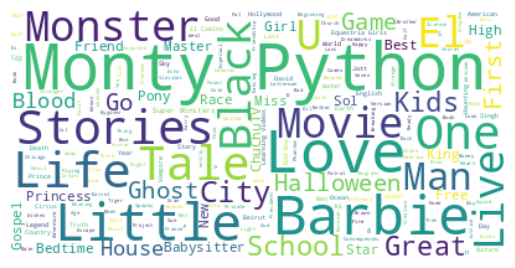

In [34]:
df_october_titles = df_5y[df_5y['month_added'] == 10]['title']
df_october_titles_text = ', '.join(df_october_titles.tolist())

stopwords = set(STOPWORDS)
stopwords.add('La')
wordcloud = WordCloud(background_color="white", stopwords=stopwords).generate(df_october_titles_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<div class='green'>It would be difficult to state that 'Monty Python' or 'Barbie' are Halloween related themes! However we can still see some Halloween linked words like 'Monster', 'Halloween', 'Blood' or 'Ghost'.


<span id='q6'></span>
## Q6. How novel are the titles, i.e, how much time between production year and availability in the platform?

In [35]:
df_age = df[['release_year', 'year_added']]
df_age['age'] = df['year_added'] - df['release_year']

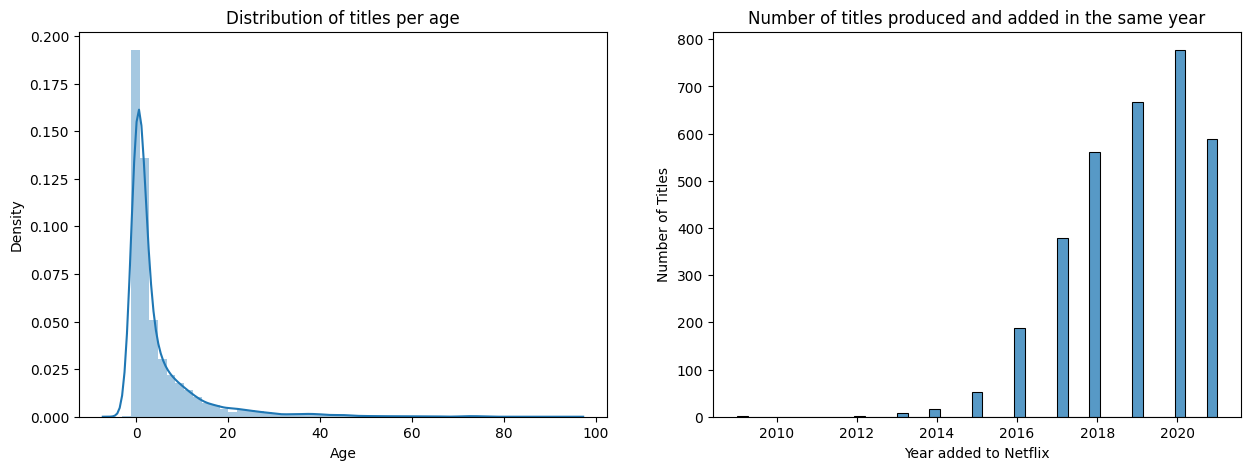

In [36]:
f, ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df_age.age, ax=ax[0])
sns.histplot(df_age[df_age.age == 0], x='year_added', ax=ax[1])
ax[0].set_title('Distribution of titles per age')
ax[0].set_xlabel('Age')
ax[1].set_title('Number of titles produced and added in the same year')
ax[1].set_xlabel('Year added to Netflix')
ax[1].set_ylabel('Number of Titles')
plt.show()

<div class='green'>Most of the titles have been produced and added to the platform either in the same or the following year, which may correspond to "Netflix Original" titles. If we look at the number of titles produced and available in the same year, we can see and increase from 2013 onwards. From <a href='https://en.wikipedia.org/wiki/Netflix'>Netflix's Wikipedia page</a> the first "Netflix Original" production was released on February 1, 2013.</div>

<span id='q7'></span>
## Q7. What's the duration distribution for movies and TV shows?

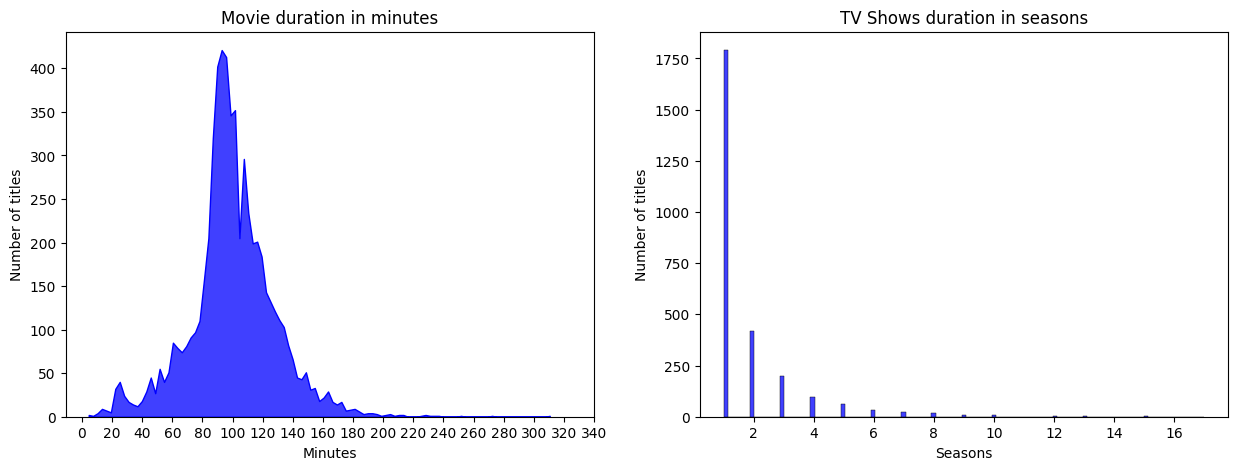

In [38]:
# Separate duration for movies and TV Shows
duration_movies = df[df['type'] == 'Movie']['duration']
duration_shows = df[df['type'] == 'TV Show']['duration']

f, ax = plt.subplots(1,2, figsize=(15,5))
a = sns.histplot(duration_movies, element='poly', color='b', ax=ax[0])
sns.histplot(duration_shows, color='b', ax=ax[1])
ax[0].set_title('Movie duration in minutes')
ax[0].set_xlabel('Minutes')
ax[0].set_xticks(range(0,350,20))
ax[1].set_title('TV Shows duration in seasons')
ax[1].set_xlabel('Seasons')
for x in ax:
    x.set_ylabel('Number of titles')
plt.show()

<div class='green'>The largest proportion of movies last between 90 and 100 minutes, while most of the TV Shows only have 1 Season in the platform.</div>

<span id='q8'></span>
## Q8. What's the distribution of titles per category?

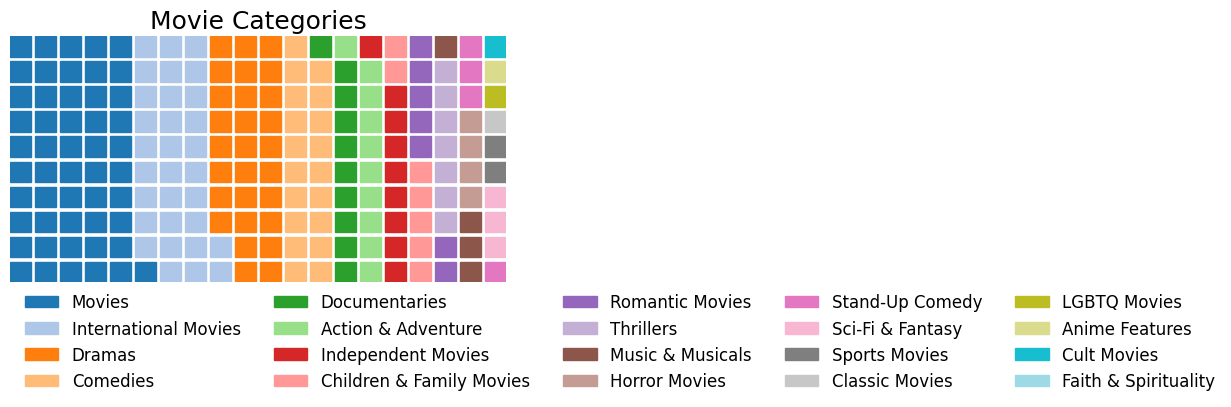

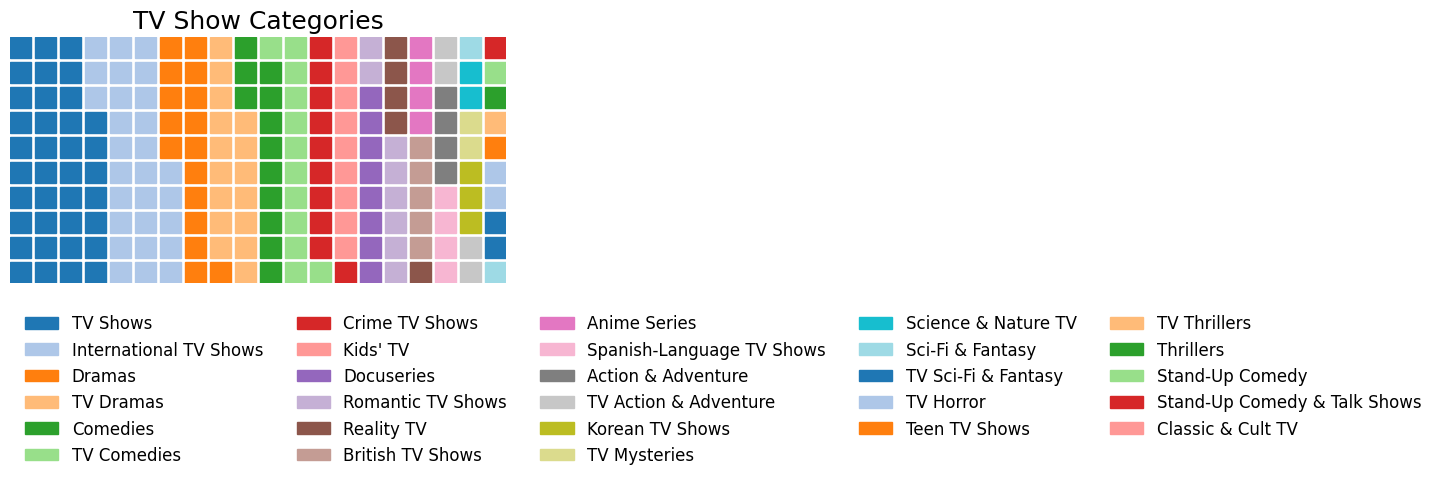

In [39]:
df_categories = df.iloc[:,[1]+list(range(15,57))]
df_categories = pd.pivot_table(df_categories, index='type', aggfunc='sum').reset_index()

# Movie categories
movie_cat = df_categories.iloc[0, 1:].to_dict()
movie_cat={x: y for x,y in movie_cat.items() if y!=0 }
movie_cat = {x: y for x, y in sorted(movie_cat.items(), key=lambda item: item[1], reverse=True)}

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=20,
    values=movie_cat,
    title={
        'label': 'Movie Categories',
        'loc': 'center',
        'fontdict': {
            'fontsize': 18
        }
    },
    cmap_name='tab20',
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.5),
        'ncol': 5,
        'framealpha': 0,
        'fontsize': 12
    }
)
# TV Show categories
show_cat = df_categories.iloc[1, 1:].to_dict()
show_cat={x: y for x,y in show_cat.items() if y!=0 }
show_cat = {x: y for x, y in sorted(show_cat.items(), key=lambda item: item[1], reverse=True)}

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=20,
    values=show_cat,
    title={
        'label': 'TV Show Categories',
        'loc': 'center',
        'fontdict': {
            'fontsize': 18
        }
    },
    cmap_name='tab20',
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.8),
        'ncol': 5,
        'framealpha': 0,
        'fontsize': 12
    }
)

<div class='green'>
    <p>Apart from the obvious categories like 'Movie' and 'TV Shows', we can see that the majority of movies are in the categories 'International Movies', 'Dramas' and 'Comedies'.</p>
    <p>For TV Shows, the most listed in categories are 'International TV Shows', 'Dramas' and 'TV Dramas'.</p>
</div>
</br>
<div>As we saw during the data cleaning process, some titles where listed in more than one category. We can use a <i>heatmap</i> to find which categories are listed together more often.</div>

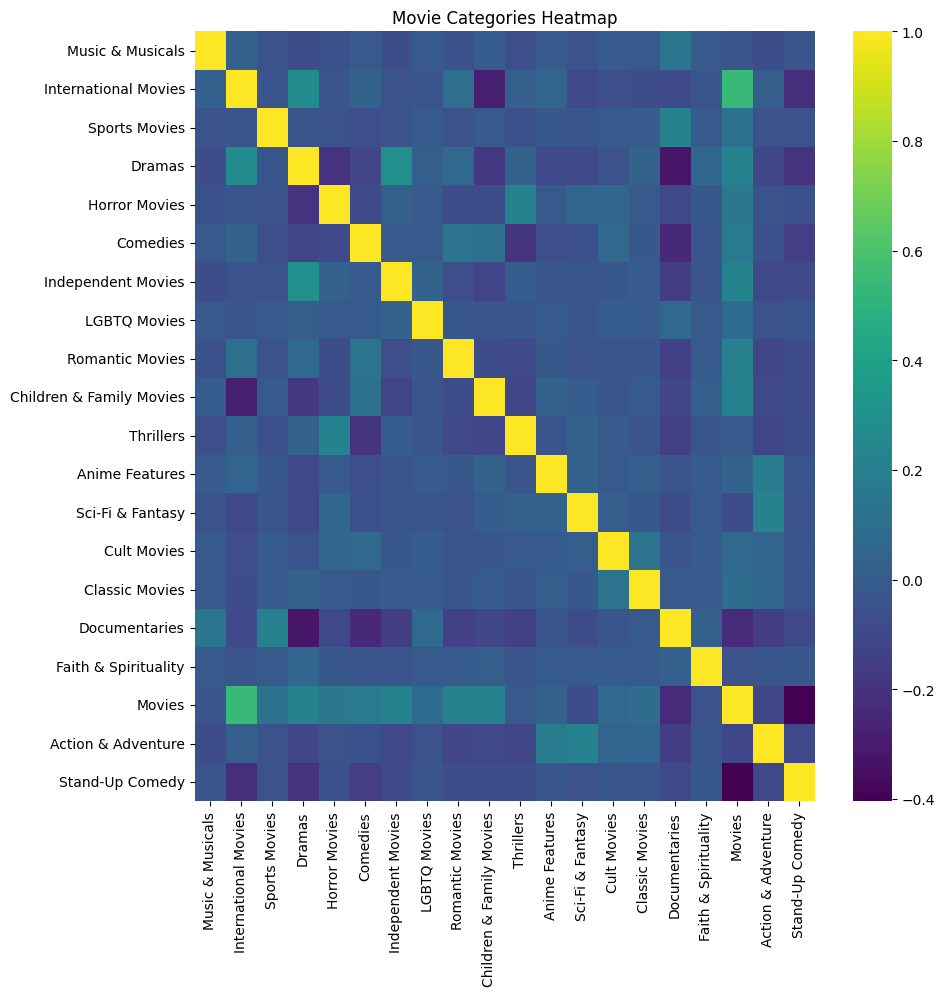

In [40]:
movies_categories_list = df[df['type']=='Movie']['listed_in'].str.split(',').to_list()
movies_categories = set([cat.strip() for entry in movies_categories_list for cat in entry])
df_movies_categories = df[df['type']=='Movie'][list(movies_categories)] 

f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_movies_categories.corr(), cmap='viridis')
ax.set_title('Movie Categories Heatmap')
plt.show()

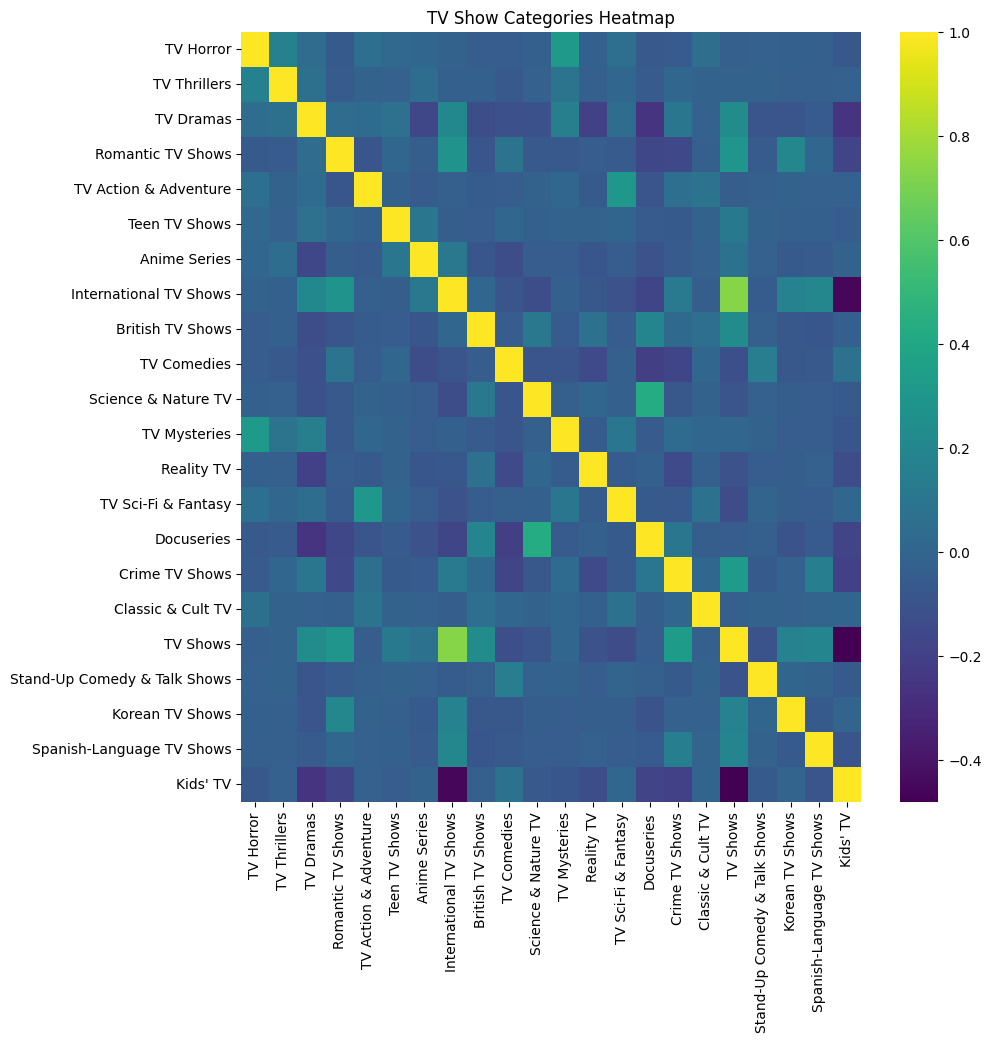

In [41]:
shows_categories_list = df[df['type']=='TV Show']['listed_in'].str.split(',').to_list()
shows_categories = set([cat.strip() for entry in shows_categories_list for cat in entry])
df_shows_categories = df[df['type']=='TV Show'][list(shows_categories)]

f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_shows_categories.corr(), cmap='viridis')
ax.set_title('TV Show Categories Heatmap')
plt.show()

<span><a href='#index'>Back to index</a></span>